In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['font.size'] = 10

In [24]:
# Datos de validación del modelo Isolation Forest
data = {
    'Contamination': [0.01, 0.025, 0.05, 0.1, 0.125, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5],
    'Accuracy': [0.8657, 0.8594, 0.8474, 0.8192, 0.8043, 0.789, 0.7576, 0.7244, 0.6908, 0.6243, 0.5502],
    'AUC_ROC': [0.6484] * 11,  # Constante en todos los modelos
    'Precision_clase_0': [0.8721, 0.8746, 0.8782, 0.8835, 0.886, 0.8883, 0.8929, 0.897, 0.9014, 0.9128, 0.9213],
    'Recall_clase_0': [0.9911, 0.9789, 0.9577, 0.9128, 0.8899, 0.8668, 0.82, 0.7723, 0.7243, 0.6287, 0.5288],
    'F1_clase_0': [0.9278, 0.9238, 0.9162, 0.8979, 0.8879, 0.8774, 0.8549, 0.83, 0.8032, 0.7446, 0.672],
    'Precision_clase_1': [0.2291, 0.2657, 0.263, 0.2403, 0.2327, 0.2263, 0.2161, 0.2066, 0.1994, 0.1914, 0.1791],
    'Recall_clase_1': [0.0178, 0.0515, 0.1021, 0.1865, 0.2257, 0.2634, 0.3353, 0.4008, 0.4643, 0.5941, 0.6948],
    'F1_clase_1': [0.0331, 0.0863, 0.1471, 0.21, 0.2292, 0.2434, 0.2628, 0.2726, 0.279, 0.2895, 0.2848],
    'TP': [104, 301, 596, 1089, 1318, 1538, 1958, 2340, 2711, 3469, 4057],
    'FN': [5735, 5538, 5243, 4750, 4521, 4301, 3881, 3499, 3128, 2370, 1782],
    'FP': [350, 832, 1670, 3442, 4346, 5259, 7104, 8988, 10882, 14655, 18598],
    'TN': [39122, 38640, 37802, 36030, 35126, 34213, 32368, 30484, 28590, 24817, 20874]
}


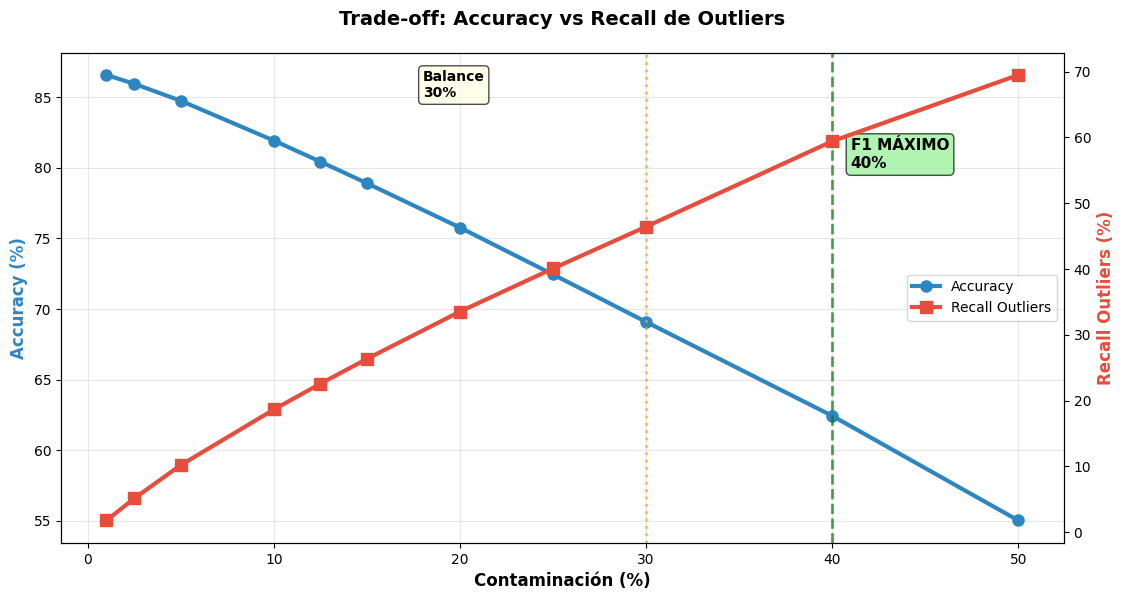

In [19]:
# Crear figura principal con métricas generales
fig1 = plt.figure(figsize=(20, 14))

# 1. Gráfico principal: Trade-off Accuracy vs Recall Outliers
ax1 = plt.subplot(2, 3, (1, 2))
line1 = ax1.plot(df['Contamination_pct'], df['Accuracy'] * 100, 'o-', 
                linewidth=3, markersize=8, color='#2E86C1', label='Accuracy')
ax1_twin = ax1.twinx()
line2 = ax1_twin.plot(df['Contamination_pct'], df['Recall_clase_1'] * 100, 's-', 
                     linewidth=3, markersize=8, color='#E74C3C', label='Recall Outliers')

# Marcar punto óptimo real (40% - F1 máximo)
ax1.axvline(x=40, color='green', linestyle='--', alpha=0.7, linewidth=2)
ax1.text(41, 80, 'F1 MÁXIMO\n40%', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7),
         fontsize=11, weight='bold')

# Marcar punto de balance (30%)
ax1.axvline(x=30, color='orange', linestyle=':', alpha=0.7, linewidth=2)
ax1.text(18, 85, 'Balance\n30%', bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7),
         fontsize=10, weight='bold')

ax1.set_xlabel('Contaminación (%)', fontsize=12, weight='bold')
ax1.set_ylabel('Accuracy (%)', color='#2E86C1', fontsize=12, weight='bold')
ax1_twin.set_ylabel('Recall Outliers (%)', color='#E74C3C', fontsize=12, weight='bold')
ax1.set_title('Trade-off: Accuracy vs Recall de Outliers', fontsize=14, weight='bold', pad=20)
ax1.grid(True, alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')


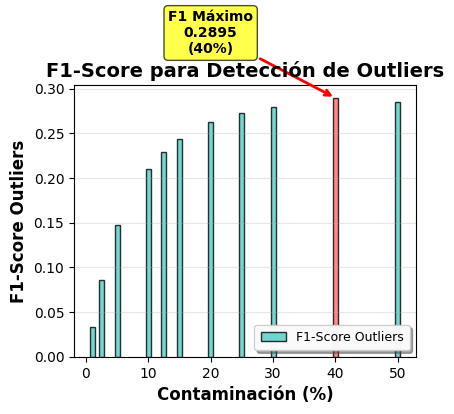

In [22]:
# 2. Evolución del F1-Score para Outliers
ax2 = plt.subplot(3, 3, 3)
bars = ax2.bar(df['Contamination_pct'], df['F1_clase_1'], 
               color=['#FF6B6B' if x == df['F1_clase_1'].max() else '#4ECDC4' for x in df['F1_clase_1']],
               alpha=0.8, edgecolor='black', linewidth=1,
               label='F1-Score Outliers')

# Anotar el valor máximo
max_f1_idx = df['F1_clase_1'].idxmax()
max_f1_val = df['F1_clase_1'].max()
ax2.annotate(f'F1 Máximo\n{max_f1_val:.4f}\n(40%)', 
            xy=(df.loc[max_f1_idx, 'Contamination_pct'], max_f1_val),
            xytext=(20, max_f1_val + 0.05),  # Posición fija que no interfiere
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, weight='bold', ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

ax2.set_xlabel('Contaminación (%)', fontsize=12, weight='bold')
ax2.set_ylabel('F1-Score Outliers', fontsize=12, weight='bold')
ax2.set_title('F1-Score para Detección de Outliers', fontsize=14, weight='bold')

# Leyenda en la esquina inferior derecha (dentro del gráfico pero sin superponerse)
ax2.legend(loc='lower right', frameon=True, shadow=True, framealpha=0.95,
          fancybox=True, borderpad=0.5, fontsize=9)

ax2.grid(True, alpha=0.3, axis='y')

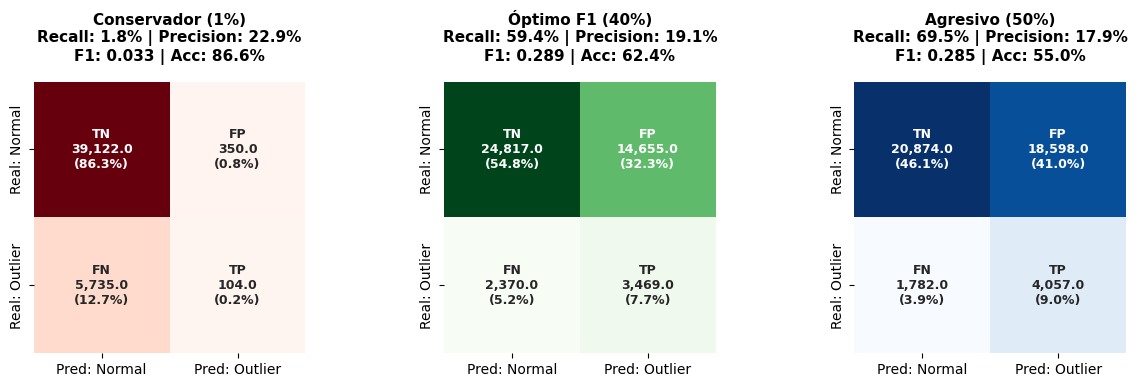

In [9]:
# 3. Matrices de confusión comparativas (3 modelos clave)
key_models = [0.01, 0.4, 0.5]  # 1%, 40% (VERDADERO ÓPTIMO), 50%
titles = ['Conservador (1%)', 'Óptimo F1 (40%)', 'Agresivo (50%)']
colors = ['Reds', 'Greens', 'Blues']  # Diferentes colores para cada modelo

for i, contamination in enumerate(key_models):
    ax = plt.subplot(3, 3, 4 + i)
    row_data = df[df['Contamination'] == contamination].iloc[0]
    
    # Crear matriz de confusión correcta (formato estándar)
    # [[TN, FP], [FN, TP]]
    confusion_matrix = np.array([[row_data['TN'], row_data['FP']], 
                                [row_data['FN'], row_data['TP']]])
    
    # Crear anotaciones personalizadas con valores y porcentajes
    total = confusion_matrix.sum()
    annot_matrix = np.empty_like(confusion_matrix, dtype=object)
    annot_matrix[0,0] = f"TN\n{confusion_matrix[0,0]:,}\n({confusion_matrix[0,0]/total*100:.1f}%)"
    annot_matrix[0,1] = f"FP\n{confusion_matrix[0,1]:,}\n({confusion_matrix[0,1]/total*100:.1f}%)"
    annot_matrix[1,0] = f"FN\n{confusion_matrix[1,0]:,}\n({confusion_matrix[1,0]/total*100:.1f}%)"
    annot_matrix[1,1] = f"TP\n{confusion_matrix[1,1]:,}\n({confusion_matrix[1,1]/total*100:.1f}%)"
    
    # Heatmap con formato mejorado
    sns.heatmap(confusion_matrix, annot=annot_matrix, fmt='', cmap=colors[i],
                square=True, ax=ax, cbar=False,
                xticklabels=['Pred: Normal', 'Pred: Outlier'],
                yticklabels=['Real: Normal', 'Real: Outlier'],
                annot_kws={"size": 9, "weight": "bold"})
    
    # Título con métricas clave
    precision_out = row_data['Precision_clase_1'] * 100
    recall_out = row_data['Recall_clase_1'] * 100
    f1_out = row_data['F1_clase_1']
    accuracy = row_data['Accuracy'] * 100
    
    ax.set_title(f'{titles[i]}\nRecall: {recall_out:.1f}% | Precision: {precision_out:.1f}%\nF1: {f1_out:.3f} | Acc: {accuracy:.1f}%', 
                fontsize=11, weight='bold', pad=15)


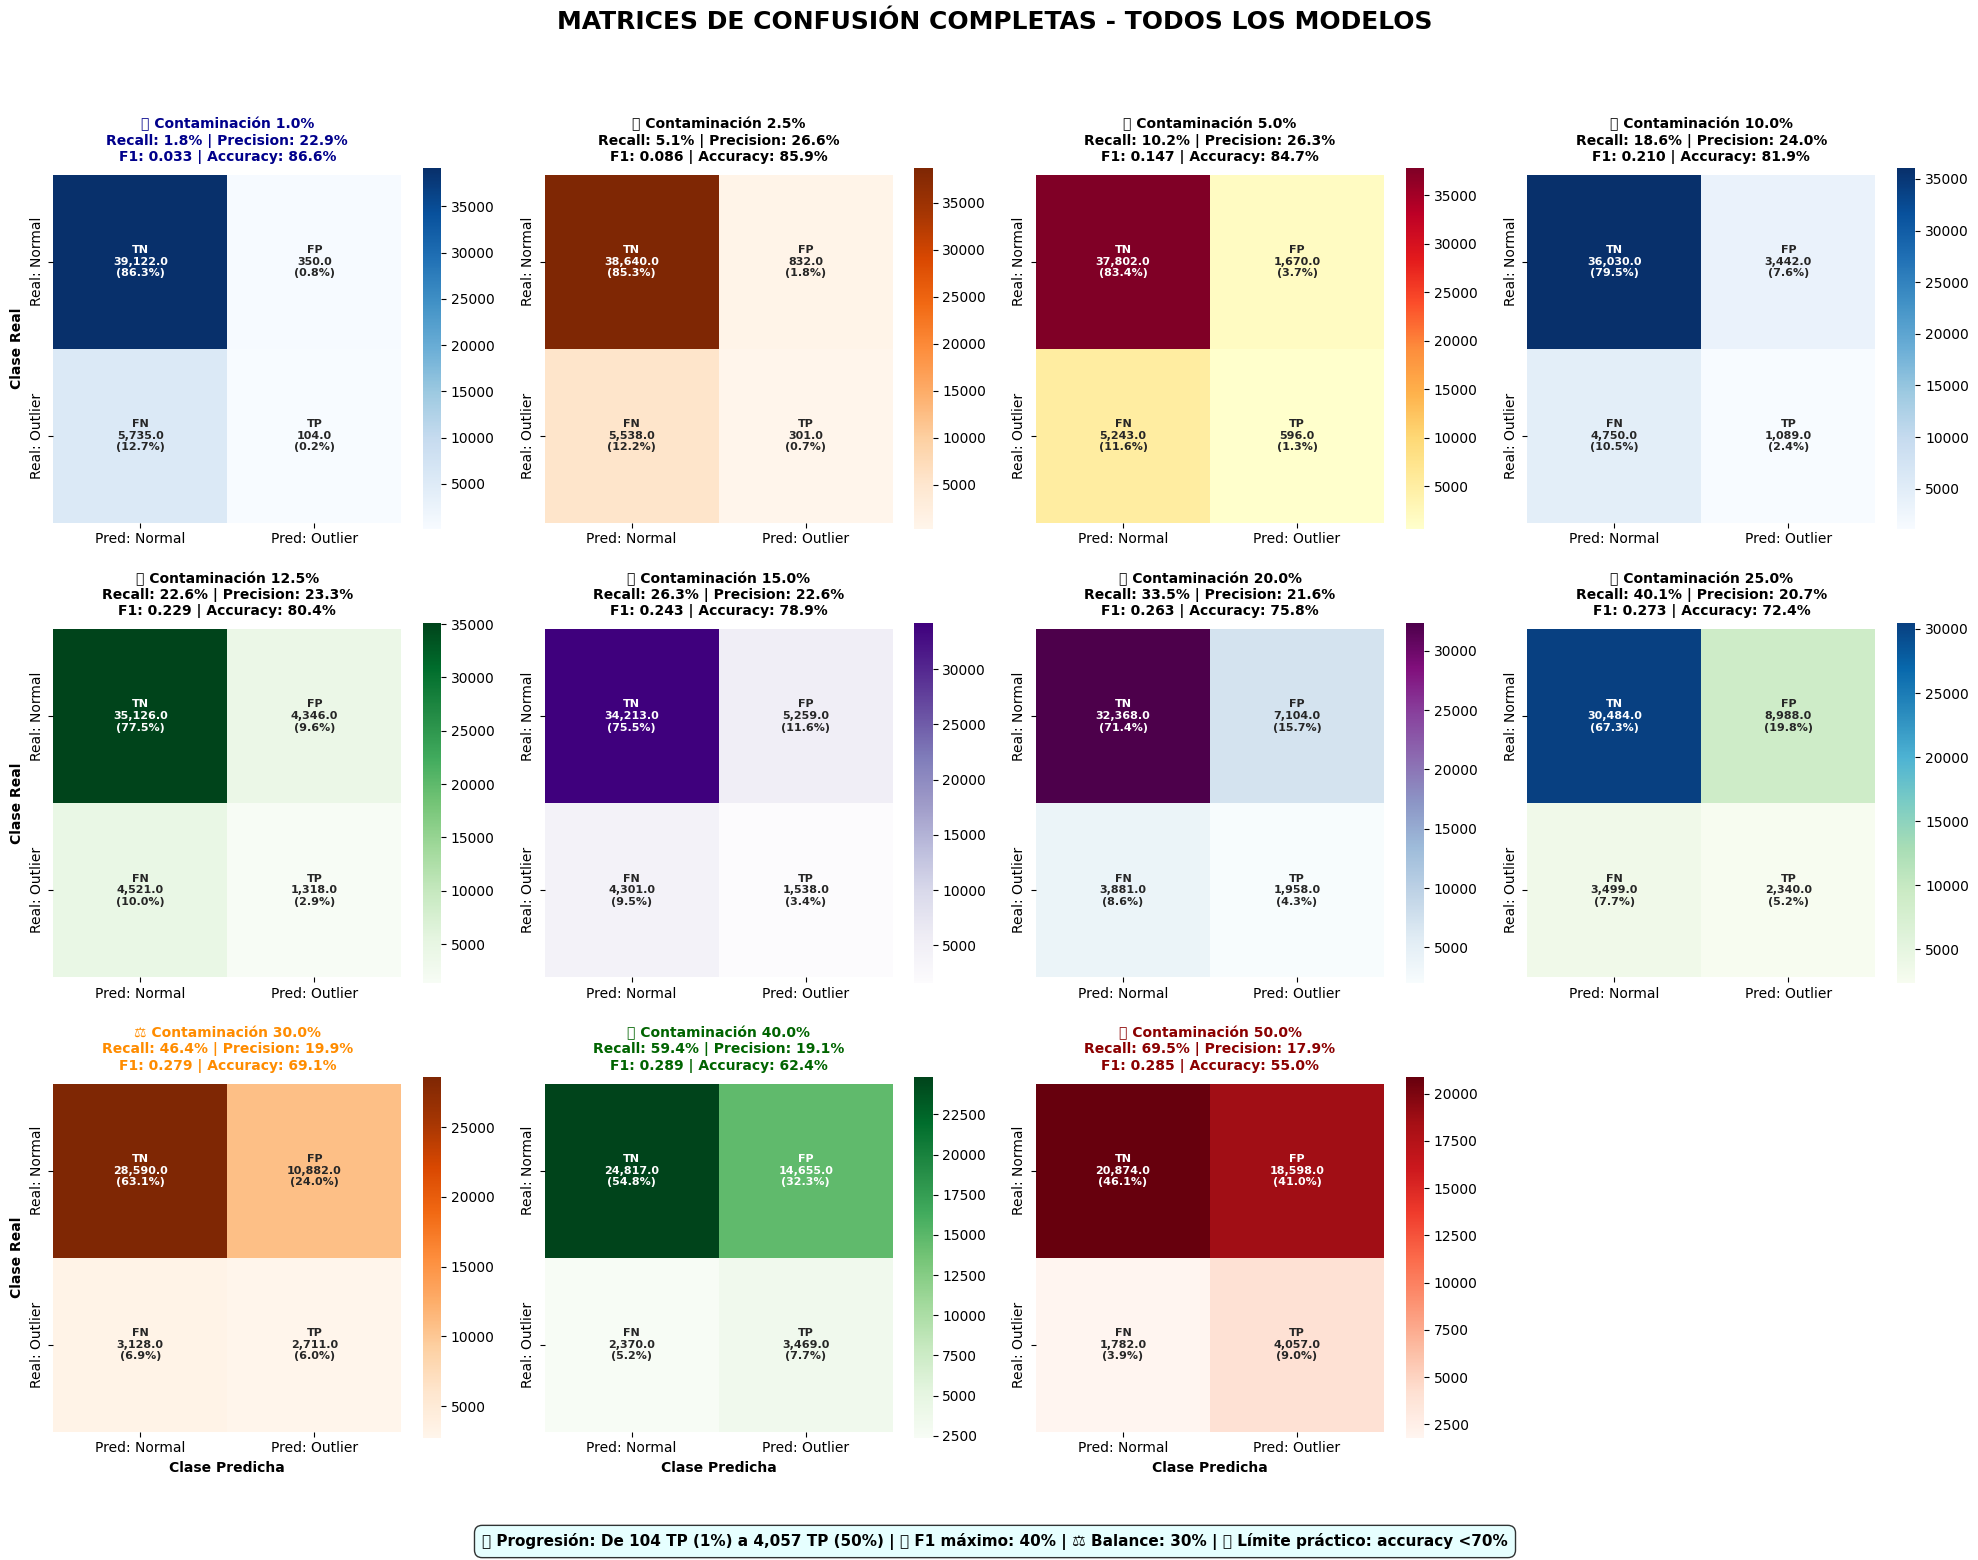

In [10]:
fig2, axes = plt.subplots(3, 4, figsize=(20, 16))
axes = axes.flatten()

# Paleta de colores para cada matriz
colors = ['Reds', 'Oranges', 'YlOrRd', 'Blues', 'Greens', 'Purples', 
          'BuPu', 'GnBu', 'OrRd', 'RdPu', 'YlGnBu', 'plasma']

for i, (_, row_data) in enumerate(df.iterrows()):
    if i >= len(axes):
        break
        
    ax = axes[i]
    contamination = row_data['Contamination_pct']
    
    # Crear matriz de confusión [[TN, FP], [FN, TP]]
    confusion_matrix = np.array([[row_data['TN'], row_data['FP']], 
                                [row_data['FN'], row_data['TP']]])
    
    # Crear anotaciones personalizadas
    total = confusion_matrix.sum()
    annot_matrix = np.empty_like(confusion_matrix, dtype=object)
    
    # Formatear números grandes con comas
    annot_matrix[0,0] = f"TN\n{confusion_matrix[0,0]:,}\n({confusion_matrix[0,0]/total*100:.1f}%)"
    annot_matrix[0,1] = f"FP\n{confusion_matrix[0,1]:,}\n({confusion_matrix[0,1]/total*100:.1f}%)"
    annot_matrix[1,0] = f"FN\n{confusion_matrix[1,0]:,}\n({confusion_matrix[1,0]/total*100:.1f}%)"
    annot_matrix[1,1] = f"TP\n{confusion_matrix[1,1]:,}\n({confusion_matrix[1,1]/total*100:.1f}%)"
    
    # Seleccionar color según importancia
    if contamination == 40:  # F1 máximo
        cmap = 'Greens'
        title_color = 'darkgreen'
        title_prefix = '🎯 '
    elif contamination == 30:  # Balance
        cmap = 'Oranges'
        title_color = 'darkorange'
        title_prefix = '⚖️ '
    elif contamination == 1:  # Conservador
        cmap = 'Blues'
        title_color = 'darkblue'
        title_prefix = '🔒 '
    elif contamination == 50:  # Límite
        cmap = 'Reds'
        title_color = 'darkred'
        title_prefix = '🚨 '
    else:
        cmap = colors[i % len(colors)]
        title_color = 'black'
        title_prefix = '📊 '
    
    # Crear heatmap
    sns.heatmap(confusion_matrix, annot=annot_matrix, fmt='', cmap=cmap,
                square=True, ax=ax, cbar=True, cbar_kws={'shrink': 0.8},
                xticklabels=['Pred: Normal', 'Pred: Outlier'],
                yticklabels=['Real: Normal', 'Real: Outlier'],
                annot_kws={"size": 8, "weight": "bold"})
    
    # Métricas para el título
    recall_out = row_data['Recall_clase_1'] * 100
    precision_out = row_data['Precision_clase_1'] * 100
    f1_out = row_data['F1_clase_1']
    accuracy = row_data['Accuracy'] * 100
    
    # Título detallado
    ax.set_title(f'{title_prefix}Contaminación {contamination:.1f}%\n'
                f'Recall: {recall_out:.1f}% | Precision: {precision_out:.1f}%\n'
                f'F1: {f1_out:.3f} | Accuracy: {accuracy:.1f}%', 
                fontsize=10, weight='bold', color=title_color, pad=10)
    
    # Ajustar etiquetas
    ax.set_xlabel('')
    ax.set_ylabel('')
    if i % 4 == 0:  # Primera columna
        ax.set_ylabel('Clase Real', fontsize=10, weight='bold')
    if i >= 8:  # Última fila
        ax.set_xlabel('Clase Predicha', fontsize=10, weight='bold')

# Ocultar el último subplot si hay 11 matrices (número impar)
if len(df) == 11:
    axes[11].axis('off')

fig2.suptitle('MATRICES DE CONFUSIÓN COMPLETAS - TODOS LOS MODELOS', 
             fontsize=18, weight='bold', y=0.98)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])

# Texto explicativo en la parte inferior
fig2.text(0.5, 0.02, 
         '📈 Progresión: De 104 TP (1%) a 4,057 TP (50%) | 🎯 F1 máximo: 40% | ⚖️ Balance: 30% | 🚨 Límite práctico: accuracy <70%',
         ha='center', fontsize=11, weight='bold', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightcyan', alpha=0.8))

plt.show()

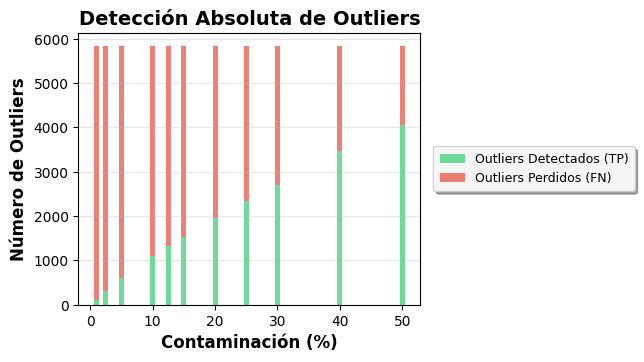

In [16]:
# 4. Detección absoluta de outliers
ax4 = plt.subplot(3, 3, 7)
ax4.bar(df['Contamination_pct'], df['TP'], alpha=0.7, color='#2ECC71', label='Outliers Detectados (TP)')
ax4.bar(df['Contamination_pct'], df['FN'], bottom=df['TP'], alpha=0.7, color='#E74C3C', label='Outliers Perdidos (FN)')

ax4.set_xlabel('Contaminación (%)', fontsize=12, weight='bold')
ax4.set_ylabel('Número de Outliers', fontsize=12, weight='bold')
ax4.set_title('Detección Absoluta de Outliers', fontsize=14, weight='bold')

# Leyenda posicionada fuera del área del gráfico
ax4.legend(loc='center left', frameon=True, shadow=True, framealpha=0.9, 
          fancybox=True, borderpad=0.5, fontsize=9, 
          bbox_to_anchor=(1.02, 0.5))

ax4.grid(True, alpha=0.3, axis='y')

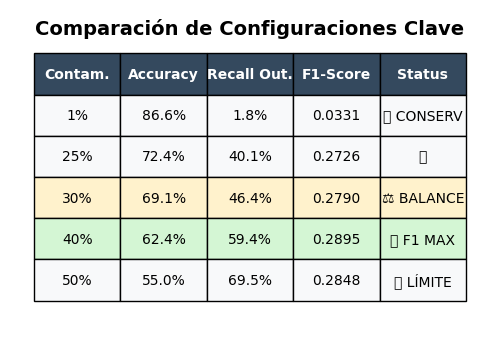


📊 ANÁLISIS DE VALIDACIÓN - ISOLATION FOREST
✅ Punto óptimo F1 máximo: 40% de contaminación (F1: 0.2895)
⚖️  Balance práctico recomendado: 30% (F1: 0.2790, Accuracy: 69.08%)
📈 Diferencia: +10.5 puntos F1 por -6.65% accuracy
🚨 Limitación identificada: AUC-ROC constante en 0.6484


In [17]:
# 5. Resumen de métricas clave
ax6 = plt.subplot(3, 3, 9)
ax6.axis('off')

# Crear tabla resumen con configuraciones más relevantes
summary_data = df[df['Contamination'].isin([0.01, 0.25, 0.3, 0.4, 0.5])][
    ['Contamination_pct', 'Accuracy', 'Recall_clase_1', 'F1_clase_1']
].round(4)

summary_data['Accuracy'] = (summary_data['Accuracy'] * 100).round(1)
summary_data['Recall_clase_1'] = (summary_data['Recall_clase_1'] * 100).round(1)

table_data = []
for _, row in summary_data.iterrows():
    if row['Contamination_pct'] == 40:
        status = '🎯 F1 MAX'
    elif row['Contamination_pct'] == 30:
        status = '⚖️ BALANCE'
    elif row['Contamination_pct'] == 1:
        status = '🔒 CONSERV'
    elif row['Contamination_pct'] == 50:
        status = '🚨 LÍMITE'
    else:
        status = '📊'
    
    table_data.append([f"{row['Contamination_pct']:.0f}%", 
                      f"{row['Accuracy']:.1f}%", 
                      f"{row['Recall_clase_1']:.1f}%", 
                      f"{row['F1_clase_1']:.4f}", 
                      status])

table = ax6.table(cellText=table_data,
                 colLabels=['Contam.', 'Accuracy', 'Recall Out.', 'F1-Score', 'Status'],
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15, 0.15, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Estilizar tabla
for i in range(len(table_data) + 1):
    for j in range(5):
        if i == 0:  # Header
            table[(i, j)].set_facecolor('#34495E')
            table[(i, j)].set_text_props(weight='bold', color='white')
        elif table_data[i-1][4] == '🎯 F1 MAX':  # Fila óptima F1
            table[(i, j)].set_facecolor('#D4F6D4')  # Verde claro
        elif table_data[i-1][4] == '⚖️ BALANCE':  # Fila balance
            table[(i, j)].set_facecolor('#FFF2CC')  # Amarillo claro
        else:
            table[(i, j)].set_facecolor('#F8F9FA')

ax6.set_title('Comparación de Configuraciones Clave', fontsize=14, weight='bold', y=0.9)

# Título general
fig.suptitle('ANÁLISIS COMPLETO: OPTIMIZACIÓN DEL MODELO ISOLATION FOREST', 
             fontsize=18, weight='bold', y=0.95)

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.92])

# Agregar texto de conclusión corregido
fig.text(0.5, 0.02, 
         '💡 CONCLUSIÓN: F1 máximo en 40% (0.2895), pero 30% ofrece balance práctico (F1=0.279, Acc=69.1%)',
         ha='center', fontsize=12, weight='bold', 
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', alpha=0.8))

plt.show()

# Código adicional para gráfico interactivo opcional
print("\n" + "="*60)
print("📊 ANÁLISIS DE VALIDACIÓN - ISOLATION FOREST")
print("="*60)
print(f"✅ Punto óptimo F1 máximo: 40% de contaminación (F1: {df['F1_clase_1'].max():.4f})")
print(f"⚖️  Balance práctico recomendado: 30% (F1: {df[df['Contamination']==0.3]['F1_clase_1'].values[0]:.4f}, Accuracy: 69.08%)")
print(f"📈 Diferencia: +{((df['F1_clase_1'].max() - df[df['Contamination']==0.3]['F1_clase_1'].values[0])*1000):.1f} puntos F1 por -6.65% accuracy")
print(f"🚨 Limitación identificada: AUC-ROC constante en 0.6484")
print("="*60)